Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
                             0                 1                 2      \
Afghanistan            Afghanistan       Afghanistan       Afghanistan   
1963-01-01              1964-01-01        1965-01-01        1966-01-01   
751111191.111111  800000044.444444  1006666637.77778  1399999966.66667   
Unnamed: 3                     NaN               NaN               NaN   
57.9703478834154          58.06694         58.070006         58.128268   

                             3                 4                 5      \
Afghanistan            Afghanistan       Afghanistan       Afghanistan   
1963-01-01              1967-01-01        1968-01-01        1969-01-01   
751111191.111111  1673333417.77778  1373333366.66667  1408888922.22222   
Unnamed: 3                     NaN               NaN               NaN   
57.9703478834154         58.229459         58.230992         58.255523   

           

<ipython-input-12-bdc87d964b63>:56: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = (df2 - df2.mean()) / df2.std()
<ipython-input-12-bdc87d964b63>:56: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = (df2 - df2.mean()) / df2.std()


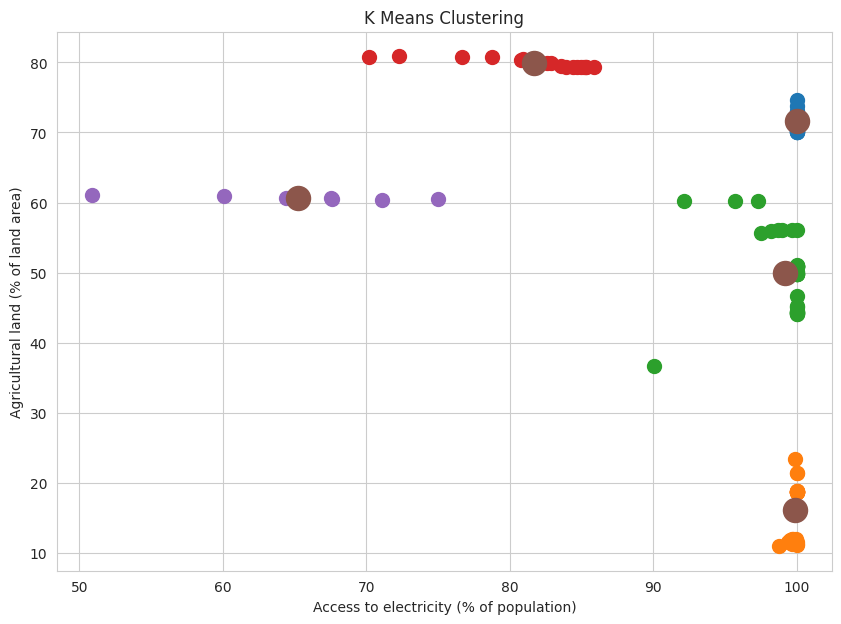

       Access to electricity (% of population)  \
2940                                  0.271377   
2943                                  0.339846   
2945                                  0.386036   
2946                                  0.410048   
2948                                  0.482500   
...                                        ...   
15993                                 0.511503   
15994                                 0.511503   
15995                                 0.511503   
15996                                 0.511503   
15997                                 0.511503   

       Agricultural land (% of land area)  CO2 emissions (kt) Country  \
2940                             0.147647            1.229136     NaN   
2943                             0.155859            2.184103     NaN   
2945                             0.161340            2.738036     NaN   
2946                             0.164080            2.835886     NaN   
2948                             0

In [12]:
!pip install wbdata
import seaborn as sns
import matplotlib.pyplot as plt
import wbdata
import numpy as np
import pandas as pd

#indicator codes
codes={'NY.GDP.MKTP.CD':'GDP (current US$)',
       'EG.ELC.ACCS.ZS':'Access to electricity (% of population)',
       'AG.LND.AGRI.ZS':'Agricultural land (% of land area)',
       'EN.ATM.CO2E.KT':'CO2 emissions (kt)',
       'SP.POP.GROW':'Population growth (annual %)',
       'EG.FEC.RNEW.ZS':'Renewable energy consumption ',
       'JI.POP.URBN.ZS':'Urban population, total',
       }
data=wbdata.get_dataframe(codes, country='all',convert_date=True)


data = data.reset_index()  # Cleaning the column

# The column is renamed
data = data.rename(columns={'country': 'Country', 'date': 'Year'})
data.to_csv('data.csv', index=False)  # Save the data as a csv file
df = pd.read_csv('/content/data.csv')
df.dropna(inplace=True)
df['Country'].unique()
def clean_data(file):
    df1 = pd.read_csv(file, skiprows=4)
    df1 = df1.transpose()
    df1 = df1.dropna(how='all')
    return df1, df1.describe()

df1_transposed, df1_summary = clean_data('/content/data.csv')
print(df1_transposed.head())
print(df1_summary)
print(clean_data.__doc__)
countries=['United States','United Kingdom','United Arab Emirates','India','Jordan','Iceland','Luxembourg','Maldives','Singapore','Malaysia','South Africa','China']
df2 = df[df['Country'].isin(countries)]

indicators = ['GDP (current US$)',
              'Access to electricity (% of population)',
              'Agricultural land (% of land area)',
              'CO2 emissions (kt)',
              'Population growth (annual %)',
              'Renewable energy consumption (% of total final energy consumption)',
              'Urban population, total (% of total population)']

df2.sort_values(by='GDP (current US$)',
                ascending=False)  # Sorting in terms of GDP

from sklearn.cluster import KMeans
df2.isnull().sum()
x=df2.iloc[:,3:5].values
df2 = df2.replace(np.NaN,0)
df2 = (df2 - df2.mean()) / df2.std()

#K Means Clustering 
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=101)
y_pred = kmeans.fit_predict(x)
plt.figure(figsize=(10,7))
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=100)
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=100)
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=100)
plt.scatter(x[y_pred == 3,0], x[y_pred == 3,1], s=100)
plt.scatter(x[y_pred == 4,0], x[y_pred == 4,1], s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300)
plt.xlabel("Access to electricity (% of population)")
plt.ylabel("Agricultural land (% of land area)")
plt.title("K Means Clustering")
plt.show()
df2.columns
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

l3= LabelEncoder()
label = l3.fit_transform(df2['GDP (current US$)'])
df3=df2.drop('GDP (current US$)',axis='columns')
df3['GDP (current US$)']=label
print(df3)
x_data = df3[['Urban population, total','CO2 emissions (kt)']]
y_data= df3['GDP (current US$)']
from sklearn.preprocessing import MinMaxScaler
x_data.head()
scalar = MinMaxScaler()
scalar.fit(x_data)
new = scalar.transform(x_data)
print(new)

Text(0.5, 1.0, 'GDP against Annual Population Growth')

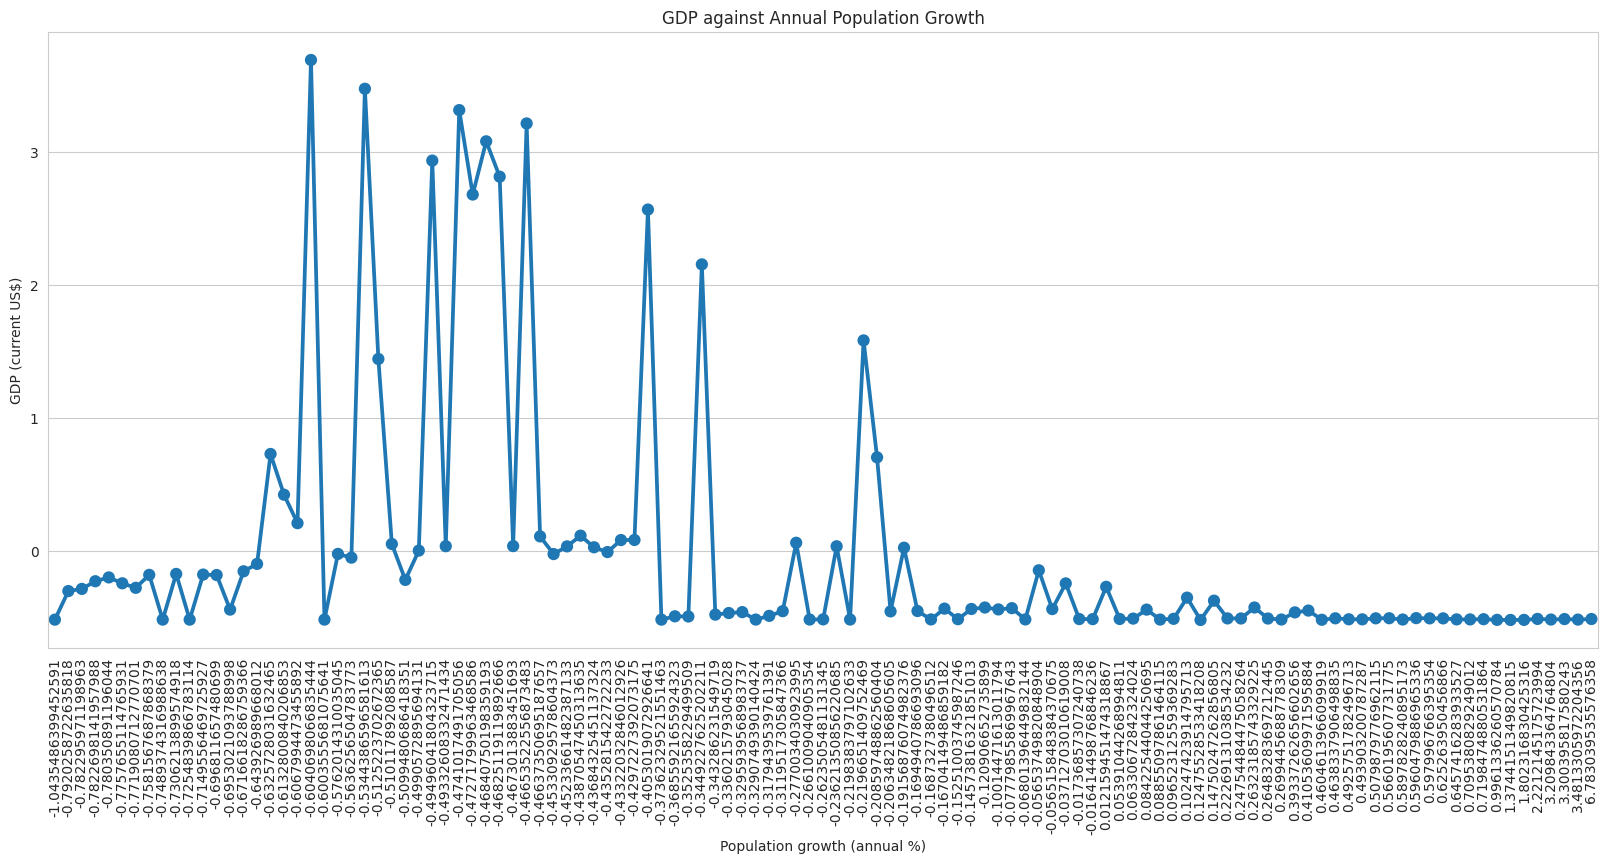

In [19]:
import seaborn as sns
plt.figure(figsize=(20,8))
sns.set_style(style='whitegrid')
sns.pointplot(y='GDP (current US$)', x='Population growth (annual %)', data=df2)
plt.xticks(rotation = 90)
plt.title('GDP against Annual Population Growth')

Text(0, 0.5, 'GDP (current US$)')

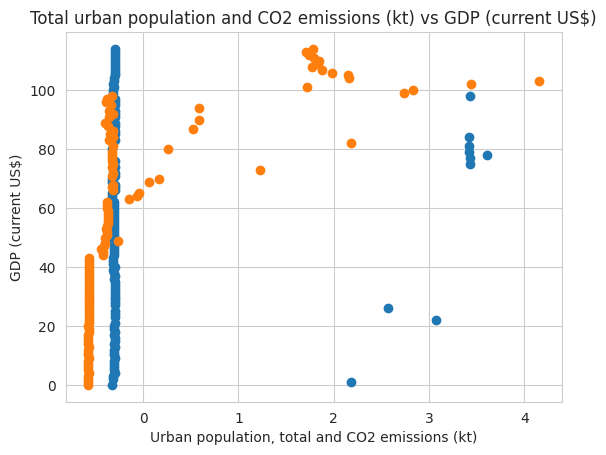

In [15]:
xd=np.asarray(x_data)
yd=np.asarray(y_data)
plt.plot(xd,yd,'o')
plt.title('Total urban population and CO2 emissions (kt) vs GDP (current US$)')
plt.xlabel('Urban population, total and CO2 emissions (kt)')
plt.ylabel('GDP (current US$)')


In [16]:
from scipy.optimize import curve_fit

# Define the linear model
def linear_model(x, a, b):
    return a * x + b

# Fit the model to the data
xdata = df2['GDP (current US$)'].values
ydata = df2['Urban population, total'].values
popt, pcov = curve_fit(linear_model, xdata, ydata)
plt.show()